In [1]:
# 파일 로드
import pandas as pd
df = pd.read_pickle('./data-4.1.pkl')

In [2]:
# 코드 길이가 200 이상인 곡 삭제
df.drop(df[df['chords'].apply(len) > 200].index, inplace=True)
# 코드 길이가 40 이하인 곡 삭제
df.drop(df[df['chords'].apply(len) < 40].index, inplace=True)
# 135767 -> 133102 -> 114897

In [3]:
from nltk import FreqDist
import numpy as np

# vocab 생성(출현 빈도 많은 순)
chords_vocab = []
for chords in df['chords']:
    for chord in chords:
        chords_vocab.append(chord[1])

vocab = FreqDist(np.hstack(chords_vocab))

In [4]:
# 정수 인코딩
chord_to_index = {word : index + 1 for index, word in enumerate(vocab)}

In [5]:
chord_to_index

{'': 1,
 'm': 2,
 '7': 3,
 'm7': 4,
 '5': 5,
 '9': 6,
 '6': 7,
 'dim': 8,
 'sus4': 9,
 '4': 10,
 'm6': 11,
 'm5': 12,
 'sus2': 13,
 '2': 14,
 'm9': 15,
 '7sus4': 16,
 'M': 17,
 '1': 18,
 'm1': 19,
 'aug': 20,
 'dim7': 21,
 'm4': 22,
 'M7': 23,
 'sus9': 24,
 '7sus2': 25,
 'mmaj7': 26,
 'm2': 27,
 'msus4': 28,
 '3': 29,
 'sus7': 30,
 '6sus2': 31,
 'm7sus4': 32,
 '9sus4': 33,
 '8': 34,
 'msus2': 35,
 '0': 36,
 'm7sus2': 37,
 '7sus9': 38,
 'M9': 39,
 'aug7': 40,
 '4sus7': 41,
 '6sus4': 42,
 'mmin': 43,
 'dim5': 44,
 'aug5': 45,
 'M6': 46,
 'aug5sus4': 47,
 'dim6': 48,
 'sus1': 49,
 'Mmaj7': 50,
 'M5': 51,
 'm0': 52,
 'M4': 53,
 'sus5': 54,
 'M1': 55,
 'dim9': 56,
 'm4sus7': 57,
 '2sus4': 58,
 'M2': 59,
 'msus9': 60,
 'sus3': 61,
 '7sus7': 62,
 'm3': 63,
 '7sus1': 64}

In [6]:
encoded = []
for chords in df['chords']:
    tmp = []
    for chord in chords:
        tmp.append([chord[0], chord_to_index[chord[1]], chord[2]])
    encoded.append(tmp)

곡의 평균 길이 : 88.68047033429941


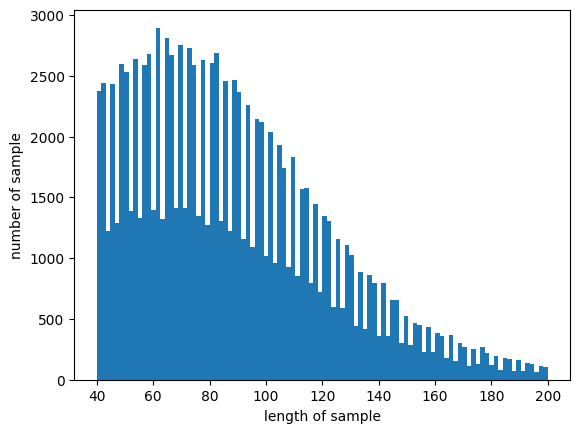

In [7]:
import matplotlib.pyplot as plt

# 정보 출력
print(f'곡의 평균 길이 : {(sum(map(len, encoded))/len(encoded))}')
plt.hist([len(s) for s in encoded], bins=100)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [8]:
from collections import Counter
import re
# 장르 리스트로 수정
result = []
for genres in df['genres']:
    song_genres = []
    song_genres.extend(re.findall(r"'(.*?)'", genres))
    result.append(song_genres)
print(result[0])

['canadian pop', 'pop', 'post-teen pop']


In [9]:
df['genres'] = result
print(df)

                                                   chords  \
0       [[1, , ], [8, , ], [8, , 12], [1, , ], [3, , ]...   
1       [[7, m7, ], [3, 2, ], [7, m7, ], [3, 2, ], [6,...   
2       [[5, m, ], [3, , ], [1, , ], [1, , ], [3, , ],...   
3       [[1, , ], [5, m, ], [12, m, ], [10, m, ], [1, ...   
4       [[8, m, ], [3, m, ], [1, , ], [1, , ], [8, m, ...   
...                                                   ...   
135762  [[12, , ], [5, , ], [12, , ], [5, , ], [12, , ...   
135763  [[1, , ], [10, 5, ], [10, 5, ], [8, , ], [10, ...   
135764  [[1, , ], [3, m, ], [1, , ], [3, m, ], [6, , ]...   
135765  [[12, , ], [3, , ], [8, , ], [8, , ], [5, m, ]...   
135766  [[3, , ], [6, , ], [8, , ], [6, , ], [3, , ], ...   

                                                   genres  
0                      [canadian pop, pop, post-teen pop]  
1                      [canadian pop, pop, post-teen pop]  
2                      [canadian pop, pop, post-teen pop]  
3                      [can

In [10]:
# 장르가 0개인 곡 삭제
print(len(df))
df = df[df['genres'].apply(len) > 0]
print(df)

114897
                                                   chords  \
0       [[1, , ], [8, , ], [8, , 12], [1, , ], [3, , ]...   
1       [[7, m7, ], [3, 2, ], [7, m7, ], [3, 2, ], [6,...   
2       [[5, m, ], [3, , ], [1, , ], [1, , ], [3, , ],...   
3       [[1, , ], [5, m, ], [12, m, ], [10, m, ], [1, ...   
4       [[8, m, ], [3, m, ], [1, , ], [1, , ], [8, m, ...   
...                                                   ...   
135762  [[12, , ], [5, , ], [12, , ], [5, , ], [12, , ...   
135763  [[1, , ], [10, 5, ], [10, 5, ], [8, , ], [10, ...   
135764  [[1, , ], [3, m, ], [1, , ], [3, m, ], [6, , ]...   
135765  [[12, , ], [3, , ], [8, , ], [8, , ], [5, m, ]...   
135766  [[3, , ], [6, , ], [8, , ], [6, , ], [3, , ], ...   

                                                   genres  
0                      [canadian pop, pop, post-teen pop]  
1                      [canadian pop, pop, post-teen pop]  
2                      [canadian pop, pop, post-teen pop]  
3                   

In [11]:
# vocab 생성(출현 빈도 많은 순)

genres_vocab = []
for genres in df['genres']:
    for genre in genres:
        genres_vocab.append(genre)

vocab = Counter(genres_vocab)

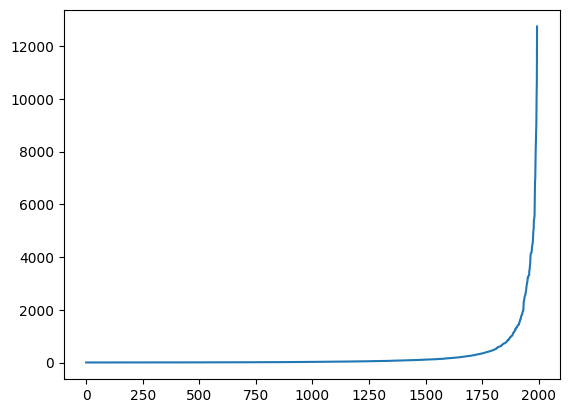

In [12]:
plt.plot(sorted(list(vocab.values())))
plt.show()

In [13]:
most_genre = []
for song_genres in df['genres']:
    tmp = song_genres[0]
    for g in song_genres:
        if vocab[tmp] < vocab[g]:
            tmp = g
    most_genre.append(tmp)
print(most_genre)
print(len(df))
print(len(most_genre))

['pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'latin', 'la

In [14]:
# vocab 생성(출현 빈도 많은 순)
vocab = Counter(most_genre)
print(vocab)
len(vocab)

Counter({'rock': 12742, 'pop': 10477, 'adult standards': 9779, 'mpb': 9109, 'country': 5801, 'latin pop': 4756, 'pop rock': 4094, 'brazilian gospel': 3982, 'pagode': 3119, 'christian music': 3045, 'rock en espanol': 2806, 'sertanejo': 2208, 'mellow gold': 1871, 'dance pop': 1544, 'brazilian rock': 1539, 'modern rock': 1528, 'pop punk': 1455, 'latin worship': 1321, 'ranchera': 1010, 'alternative metal': 951, 'spanish pop': 914, 'indonesian pop': 865, 'indie rock': 775, 'german pop': 751, 'chanson': 717, 'neo mellow': 676, 'post-teen pop': 646, 'indie pop': 598, 'italian adult pop': 592, 'regional mexican': 566, 'outlaw country': 528, 'k-pop': 504, 'soft rock': 501, 'stomp and holler': 494, 'nova mpb': 471, 'europop': 438, 'latin': 431, 'dutch rock': 410, 'axe': 410, 'funk carioca': 408, 'permanent wave': 401, 'alternative rock': 400, 'punk': 383, 'j-pop': 374, 'pop rap': 363, 'soul': 362, 'adoracao': 340, 'classic rock': 339, 'latin rock': 325, 'australian pop': 315, 'filmi': 314, 'opm'

576

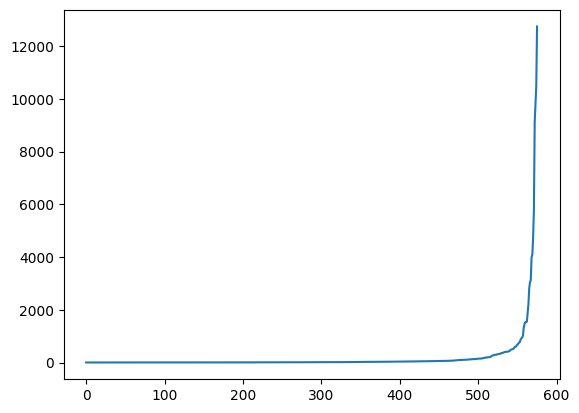

In [15]:
plt.plot(sorted(list(vocab.values())))
plt.show()

In [16]:
df2 = pd.DataFrame()
df2['chords'] = df['chords']
df2['genres'] = most_genre

df2

chords genres
0       [[1, , ], [8, , ], [8, , 12], [1, , ], [3, , ]...    pop
1       [[7, m7, ], [3, 2, ], [7, m7, ], [3, 2, ], [6,...    pop
2       [[5, m, ], [3, , ], [1, , ], [1, , ], [3, , ],...    pop
3       [[1, , ], [5, m, ], [12, m, ], [10, m, ], [1, ...    pop
4       [[8, m, ], [3, m, ], [1, , ], [1, , ], [8, m, ...    pop
...                                                   ...    ...
135762  [[12, , ], [5, , ], [12, , ], [5, , ], [12, , ...   rock
135763  [[1, , ], [10, 5, ], [10, 5, ], [8, , ], [10, ...   rock
135764  [[1, , ], [3, m, ], [1, , ], [3, m, ], [6, , ]...   rock
135765  [[12, , ], [3, , ], [8, , ], [8, , ], [5, m, ]...   rock
135766  [[3, , ], [6, , ], [8, , ], [6, , ], [3, , ], ...   rock

[114079 rows x 2 columns]

In [17]:
# import pickle

# with open('./data_new-1.1.pkl', 'wb') as f:
#     pickle.dump(df2, f)

In [18]:
# with open('./data_new-1.1.pkl', 'rb') as f:
#     df2 = pickle.load(f)
# df2

In [34]:
counts = df2.groupby('genres')['genres'].transform('count')
# df3 = df2[counts > 3000]
df3 = df2.copy()
df3

chords genres
0       [[1, , ], [8, , ], [8, , 12], [1, , ], [3, , ]...    pop
1       [[7, m7, ], [3, 2, ], [7, m7, ], [3, 2, ], [6,...    pop
2       [[5, m, ], [3, , ], [1, , ], [1, , ], [3, , ],...    pop
3       [[1, , ], [5, m, ], [12, m, ], [10, m, ], [1, ...    pop
4       [[8, m, ], [3, m, ], [1, , ], [1, , ], [8, m, ...    pop
...                                                   ...    ...
135762  [[12, , ], [5, , ], [12, , ], [5, , ], [12, , ...   rock
135763  [[1, , ], [10, 5, ], [10, 5, ], [8, , ], [10, ...   rock
135764  [[1, , ], [3, m, ], [1, , ], [3, m, ], [6, , ]...   rock
135765  [[12, , ], [3, , ], [8, , ], [8, , ], [5, m, ]...   rock
135766  [[3, , ], [6, , ], [8, , ], [6, , ], [3, , ], ...   rock

[114079 rows x 2 columns]

In [35]:
# 장르 정수 인코딩
# vocab 생성(출현 빈도 많은 순)
genres_vocab = []
for genres in df3['genres']:
    genres_vocab.append(genres)

# 정수 인코딩할 인덱스
vocab = FreqDist(np.hstack(genres_vocab))
genre_to_index = {word : index for index, word in enumerate(vocab)}

genre_to_index

{'rock': 0,
 'pop': 1,
 'adult standards': 2,
 'mpb': 3,
 'country': 4,
 'latin pop': 5,
 'pop rock': 6,
 'brazilian gospel': 7,
 'pagode': 8,
 'christian music': 9,
 'rock en espanol': 10,
 'sertanejo': 11,
 'mellow gold': 12,
 'dance pop': 13,
 'brazilian rock': 14,
 'modern rock': 15,
 'pop punk': 16,
 'latin worship': 17,
 'ranchera': 18,
 'alternative metal': 19,
 'spanish pop': 20,
 'indonesian pop': 21,
 'indie rock': 22,
 'german pop': 23,
 'chanson': 24,
 'neo mellow': 25,
 'post-teen pop': 26,
 'indie pop': 27,
 'italian adult pop': 28,
 'regional mexican': 29,
 'outlaw country': 30,
 'k-pop': 31,
 'soft rock': 32,
 'stomp and holler': 33,
 'nova mpb': 34,
 'europop': 35,
 'latin': 36,
 'dutch rock': 37,
 'axe': 38,
 'funk carioca': 39,
 'permanent wave': 40,
 'alternative rock': 41,
 'punk': 42,
 'j-pop': 43,
 'pop rap': 44,
 'soul': 45,
 'adoracao': 46,
 'classic rock': 47,
 'latin rock': 48,
 'australian pop': 49,
 'filmi': 50,
 'opm': 51,
 'swedish pop': 52,
 'cuarteto': 

In [36]:
# 정수 인코딩 후 데이터 교체
encoded = []
for genre in df3['genres']:
    encoded.append(genre_to_index[genre])

df3['genres'] = encoded
df3

chords  genres
0       [[1, , ], [8, , ], [8, , 12], [1, , ], [3, , ]...       1
1       [[7, m7, ], [3, 2, ], [7, m7, ], [3, 2, ], [6,...       1
2       [[5, m, ], [3, , ], [1, , ], [1, , ], [3, , ],...       1
3       [[1, , ], [5, m, ], [12, m, ], [10, m, ], [1, ...       1
4       [[8, m, ], [3, m, ], [1, , ], [1, , ], [8, m, ...       1
...                                                   ...     ...
135762  [[12, , ], [5, , ], [12, , ], [5, , ], [12, , ...       0
135763  [[1, , ], [10, 5, ], [10, 5, ], [8, , ], [10, ...       0
135764  [[1, , ], [3, m, ], [1, , ], [3, m, ], [6, , ]...       0
135765  [[12, , ], [3, , ], [8, , ], [8, , ], [5, m, ]...       0
135766  [[3, , ], [6, , ], [8, , ], [6, , ], [3, , ], ...       0

[114079 rows x 2 columns]

In [37]:
# # 코드종류 정수 인코딩
# # vocab 생성(출현 빈도 많은 순)
# chords_vocab = []
# for chords in df3['chords']:
#     for chord in chords:
#         chords_vocab.append(chord[1])

# vocab = FreqDist(np.hstack(chords_vocab))
# vocab

FreqDist({'': 6693236, 'm': 1919918, '7': 644848, 'm7': 393645, '5': 108305, '9': 99890, '6': 48330, 'dim': 44293, 'sus4': 28127, '4': 27837, ...})

In [38]:
chord_to_index = {word : index for index, word in enumerate(vocab)}
chord_to_index = {'': 1,
 'm': 2,
 '7': 3,
 'm7': 4,
 '5': 5,
 '9': 6,
 '6': 7,
 'dim': 8,
 'sus4': 9,
 '4': 10,
 'm6': 11,
 'm5': 12,
 'sus2': 13,
 '2': 14,
 'm9': 15,
 '7sus4': 16,
 'M': 17,
 '1': 18,
 'm1': 19,
 'aug': 20,
 'dim7': 21,
 'm4': 22,
 'M7': 23,
 'sus9': 24,
 '7sus2': 25,
 'mmaj7': 26,
 'm2': 27,
 'msus4': 28,
 '3': 29,
 'sus7': 30,
 '6sus2': 31,
 'm7sus4': 32,
 '9sus4': 33,
 '8': 34,
 'msus2': 35,
 '0': 36,
 'm7sus2': 37,
 '7sus9': 38,
 'M9': 39,
 'aug7': 40,
 '4sus7': 41,
 '6sus4': 42,
 'mmin': 43,
 'dim5': 44,
 'aug5': 45,
 'M6': 46,
 'aug5sus4': 47,
 'dim6': 48,
 'sus1': 49,
 'Mmaj7': 50,
 'M5': 51,
 'm0': 52,
 'M4': 53,
 'sus5': 54,
 'M1': 55,
 'dim9': 56,
 'm4sus7': 57,
 '2sus4': 58,
 'M2': 59,
 'msus9': 60,
 'sus3': 61,
 '7sus7': 62,
 'm3': 63,
 '7sus1': 64}
chord_to_index

{'': 1,
 'm': 2,
 '7': 3,
 'm7': 4,
 '5': 5,
 '9': 6,
 '6': 7,
 'dim': 8,
 'sus4': 9,
 '4': 10,
 'm6': 11,
 'm5': 12,
 'sus2': 13,
 '2': 14,
 'm9': 15,
 '7sus4': 16,
 'M': 17,
 '1': 18,
 'm1': 19,
 'aug': 20,
 'dim7': 21,
 'm4': 22,
 'M7': 23,
 'sus9': 24,
 '7sus2': 25,
 'mmaj7': 26,
 'm2': 27,
 'msus4': 28,
 '3': 29,
 'sus7': 30,
 '6sus2': 31,
 'm7sus4': 32,
 '9sus4': 33,
 '8': 34,
 'msus2': 35,
 '0': 36,
 'm7sus2': 37,
 '7sus9': 38,
 'M9': 39,
 'aug7': 40,
 '4sus7': 41,
 '6sus4': 42,
 'mmin': 43,
 'dim5': 44,
 'aug5': 45,
 'M6': 46,
 'aug5sus4': 47,
 'dim6': 48,
 'sus1': 49,
 'Mmaj7': 50,
 'M5': 51,
 'm0': 52,
 'M4': 53,
 'sus5': 54,
 'M1': 55,
 'dim9': 56,
 'm4sus7': 57,
 '2sus4': 58,
 'M2': 59,
 'msus9': 60,
 'sus3': 61,
 '7sus7': 62,
 'm3': 63,
 '7sus1': 64}

In [39]:
df3

chords  genres
0       [[1, , ], [8, , ], [8, , 12], [1, , ], [3, , ]...       1
1       [[7, m7, ], [3, 2, ], [7, m7, ], [3, 2, ], [6,...       1
2       [[5, m, ], [3, , ], [1, , ], [1, , ], [3, , ],...       1
3       [[1, , ], [5, m, ], [12, m, ], [10, m, ], [1, ...       1
4       [[8, m, ], [3, m, ], [1, , ], [1, , ], [8, m, ...       1
...                                                   ...     ...
135762  [[12, , ], [5, , ], [12, , ], [5, , ], [12, , ...       0
135763  [[1, , ], [10, 5, ], [10, 5, ], [8, , ], [10, ...       0
135764  [[1, , ], [3, m, ], [1, , ], [3, m, ], [6, , ]...       0
135765  [[12, , ], [3, , ], [8, , ], [8, , ], [5, m, ]...       0
135766  [[3, , ], [6, , ], [8, , ], [6, , ], [3, , ], ...       0

[114079 rows x 2 columns]

In [40]:
encoded = []
for chords in df3['chords']:
    tmp = []
    for chord in chords:
        if chord[2] == '':
            tmp.append([chord[0], chord_to_index[chord[1]], 0])
        else:
            tmp.append([chord[0], chord_to_index[chord[1]], chord[2]])
    encoded.append(tmp)
encoded

[[[1, 1, 0],
  [8, 1, 0],
  [8, 1, 12],
  [1, 1, 0],
  [3, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [8, 1, 12],
  [1, 1, 0],
  [8, 1, 0],
  [3, 1, 0],
  [1, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [5, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [10, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [8, 1, 12],
  [1, 1, 0],
  [3, 1, 0],
  [8, 1, 0],
  [3, 1, 0],
  [8, 1, 0],
  [8, 1, 12],
  [1, 1, 0],
  [8, 1, 0],
  [3, 1, 0],
  [1, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [5, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [8, 1, 0],
  [5, 2, 0],
  [1, 1, 0],
  [8, 1, 0],
  [10, 1, 0],
  [8, 

In [41]:
df3['chords'] = encoded

In [42]:
df3

chords  genres
0       [[1, 1, 0], [8, 1, 0], [8, 1, 12], [1, 1, 0], ...       1
1       [[7, 4, 0], [3, 14, 0], [7, 4, 0], [3, 14, 0],...       1
2       [[5, 2, 0], [3, 1, 0], [1, 1, 0], [1, 1, 0], [...       1
3       [[1, 1, 0], [5, 2, 0], [12, 2, 0], [10, 2, 0],...       1
4       [[8, 2, 0], [3, 2, 0], [1, 1, 0], [1, 1, 0], [...       1
...                                                   ...     ...
135762  [[12, 1, 0], [5, 1, 0], [12, 1, 0], [5, 1, 0],...       0
135763  [[1, 1, 0], [10, 5, 0], [10, 5, 0], [8, 1, 0],...       0
135764  [[1, 1, 0], [3, 2, 0], [1, 1, 0], [3, 2, 0], [...       0
135765  [[12, 1, 0], [3, 1, 0], [8, 1, 0], [8, 1, 0], ...       0
135766  [[3, 1, 0], [6, 1, 0], [8, 1, 0], [6, 1, 0], [...       0

[114079 rows x 2 columns]

In [43]:
# 잘못된 코드 있는 행 삭제
def select_rows(arr):
    for inner_arr in arr:
        if inner_arr[1] in [10, 12, 18, 19, 22, 29, 30, 31, 34, 36, 53, 54, 61, 63]:
            return False
    return True

df3 = df3[df3['chords'].apply(select_rows)]


In [44]:
print(df3)

                                                   chords  genres
0       [[1, 1, 0], [8, 1, 0], [8, 1, 12], [1, 1, 0], ...       1
1       [[7, 4, 0], [3, 14, 0], [7, 4, 0], [3, 14, 0],...       1
2       [[5, 2, 0], [3, 1, 0], [1, 1, 0], [1, 1, 0], [...       1
3       [[1, 1, 0], [5, 2, 0], [12, 2, 0], [10, 2, 0],...       1
4       [[8, 2, 0], [3, 2, 0], [1, 1, 0], [1, 1, 0], [...       1
...                                                   ...     ...
135762  [[12, 1, 0], [5, 1, 0], [12, 1, 0], [5, 1, 0],...       0
135763  [[1, 1, 0], [10, 5, 0], [10, 5, 0], [8, 1, 0],...       0
135764  [[1, 1, 0], [3, 2, 0], [1, 1, 0], [3, 2, 0], [...       0
135765  [[12, 1, 0], [3, 1, 0], [8, 1, 0], [8, 1, 0], ...       0
135766  [[3, 1, 0], [6, 1, 0], [8, 1, 0], [6, 1, 0], [...       0

[104025 rows x 2 columns]


In [47]:
df3

chords  genres
0       [[1, 1, 0], [8, 1, 0], [8, 1, 12], [1, 1, 0], ...       1
1       [[7, 4, 0], [3, 14, 0], [7, 4, 0], [3, 14, 0],...       1
2       [[5, 2, 0], [3, 1, 0], [1, 1, 0], [1, 1, 0], [...       1
3       [[1, 1, 0], [5, 2, 0], [12, 2, 0], [10, 2, 0],...       1
4       [[8, 2, 0], [3, 2, 0], [1, 1, 0], [1, 1, 0], [...       1
...                                                   ...     ...
135762  [[12, 1, 0], [5, 1, 0], [12, 1, 0], [5, 1, 0],...       0
135763  [[1, 1, 0], [10, 5, 0], [10, 5, 0], [8, 1, 0],...       0
135764  [[1, 1, 0], [3, 2, 0], [1, 1, 0], [3, 2, 0], [...       0
135765  [[12, 1, 0], [3, 1, 0], [8, 1, 0], [8, 1, 0], ...       0
135766  [[3, 1, 0], [6, 1, 0], [8, 1, 0], [6, 1, 0], [...       0

[104025 rows x 2 columns]

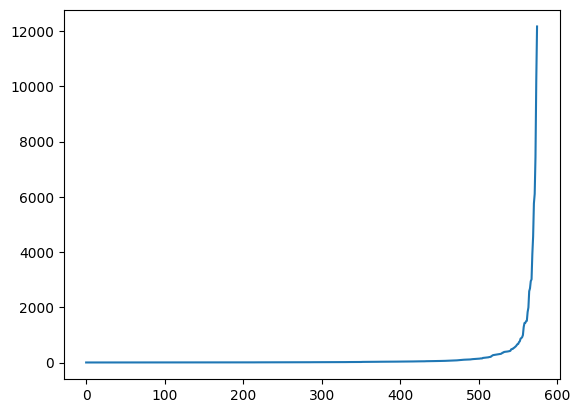

In [54]:
# vocab 생성(출현 빈도 많은 순)

genres_vocab = []
for genre in df3['genres']:
    genres_vocab.append(genre)

vocab = Counter(genres_vocab)
plt.plot(sorted(list(vocab.values())))
plt.show()

In [56]:
# 언더샘플링 완료. 10개 클래스. 클래스당 3045개.
counts = df3.groupby('genres')['genres'].transform('count')
counts
df4 = df3[counts > 3000]
df4


chords  genres
0       [[1, 1, 0], [8, 1, 0], [8, 1, 12], [1, 1, 0], ...       1
1       [[7, 4, 0], [3, 14, 0], [7, 4, 0], [3, 14, 0],...       1
2       [[5, 2, 0], [3, 1, 0], [1, 1, 0], [1, 1, 0], [...       1
3       [[1, 1, 0], [5, 2, 0], [12, 2, 0], [10, 2, 0],...       1
4       [[8, 2, 0], [3, 2, 0], [1, 1, 0], [1, 1, 0], [...       1
...                                                   ...     ...
135762  [[12, 1, 0], [5, 1, 0], [12, 1, 0], [5, 1, 0],...       0
135763  [[1, 1, 0], [10, 5, 0], [10, 5, 0], [8, 1, 0],...       0
135764  [[1, 1, 0], [3, 2, 0], [1, 1, 0], [3, 2, 0], [...       0
135765  [[12, 1, 0], [3, 1, 0], [8, 1, 0], [8, 1, 0], ...       0
135766  [[3, 1, 0], [6, 1, 0], [8, 1, 0], [6, 1, 0], [...       0

[53188 rows x 2 columns]

In [57]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)

# 언더샘플링 실행
feature_resampled, target_resampled = rus.fit_resample(df4[['chords']], df4['genres'])

# 언더샘플링 결과를 DataFrame으로 변환
df5 = pd.DataFrame(feature_resampled, columns=['chords'])
df5['genres'] = target_resampled

df5

chords  genres
45947   [[8, 1, 0], [1, 1, 0], [8, 1, 0], [1, 1, 0], [...       0
7581    [[8, 1, 0], [10, 1, 0], [8, 1, 0], [10, 1, 0],...       0
135572  [[3, 1, 0], [5, 5, 0], [8, 5, 0], [10, 5, 0], ...       0
76934   [[8, 1, 0], [1, 1, 0], [3, 1, 0], [8, 1, 0], [...       0
2869    [[10, 4, 0], [3, 3, 0], [8, 1, 0], [10, 4, 0],...       0
...                                                   ...     ...
132209  [[6, 1, 0], [10, 2, 0], [11, 1, 0], [6, 1, 0],...       7
132211  [[5, 4, 0], [1, 6, 0], [3, 6, 0], [8, 6, 0], [...       7
132214  [[5, 1, 0], [10, 1, 0], [5, 1, 0], [5, 1, 0], ...       7
132215  [[8, 1, 0], [3, 1, 7], [5, 2, 0], [8, 1, 12], ...       7
132216  [[8, 1, 0], [3, 1, 0], [10, 2, 0], [1, 1, 0], ...       7

[24112 rows x 2 columns]

In [58]:
Counter(df5['genres'])

Counter({0: 3014,
         1: 3014,
         2: 3014,
         3: 3014,
         4: 3014,
         5: 3014,
         6: 3014,
         7: 3014})

여기부터 패딩 적용 + 텐서로 변환

In [59]:
import torch
from torch.nn.utils.rnn import pad_sequence

features = df5['chords']
target_class = df5['genres']

features_list = [torch.tensor(f) for f in features]
features_padded = pad_sequence(features_list, batch_first=True)
target_class_tensor = torch.tensor(target_class.values)

print(features_padded)
print(target_class_tensor)

tensor([[[ 8,  1,  0],
         [ 1,  1,  0],
         [ 8,  1,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 8,  1,  0],
         [10,  1,  0],
         [ 8,  1,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 3,  1,  0],
         [ 5,  5,  0],
         [ 8,  5,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 5,  1,  0],
         [10,  1,  0],
         [ 5,  1,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 8,  1,  0],
         [ 3,  1,  7],
         [ 5,  2,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 8,  1,  0],
         [ 3,  1,  0],
         [10,  2,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]])
tensor([0, 0, 0,  ..., 7, 7, 7])


In [60]:
print(features_padded.shape)
print(target_class_tensor.shape)

torch.Size([24112, 200, 3])
torch.Size([24112])


In [61]:
import pickle

# 쓰기
with open('./data_tmp.pkl', 'wb') as f:
    pickle.dump(features_padded, f)
    pickle.dump(target_class_tensor, f)

In [62]:
# 다시 확인
with open('./data_tmp.pkl', 'rb') as f:
    training_input = pickle.load(f)
    training_output = pickle.load(f)

print(training_input)
print(training_output)

tensor([[[ 8,  1,  0],
         [ 1,  1,  0],
         [ 8,  1,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 8,  1,  0],
         [10,  1,  0],
         [ 8,  1,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 3,  1,  0],
         [ 5,  5,  0],
         [ 8,  5,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 5,  1,  0],
         [10,  1,  0],
         [ 5,  1,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 8,  1,  0],
         [ 3,  1,  7],
         [ 5,  2,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 8,  1,  0],
         [ 3,  1,  0],
         [10,  2,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]])
tensor([0, 0, 0,  ..., 7, 7, 7])
